In [1]:
import numpy as np
import matplotlib.pyplot as plt

1- Considere la siguiente serie de puntos:
$$ C = \{(2, 2), (3, 6), (4, 5), (5, 5), (6, 6)\}$$

- ¿Cuál sería el polinomio de mayor grado capaz de pasar por todos ellos?
- Cree un código que muestre los coeficientes correspondientes al polinomio de mayor grado (puede usar Sympy).
- Genere un gráfico que:
    - Muestre los puntos.
    - Muestre una curva generada por el polinomio de mayor grado (interpolación).

In [ ]:
# Respuesta
# a)
# El polinomio de mayor grado sería cuatro puesto que tenemos 5 puntos de datos, es decir:
# p_4 = a_0 + a_1 x +a_2 x^2 + a_3 x^3 + a_4 x^4

In [2]:
# b)
import sympy as sym

# Implementemos el Polinomio de Lagrange
def Lagrang(data_x, data_y):
    """
    falta añadir que no existan numeros de x repetidos y orden ascendente
    """
    n = len(data_x)  # longitud de los datos
    
    x = sym.Symbol('x')  # creando objeto de sympy que me ''crea'' la variable x

    polinomio = 0
    #divisorL = np.zeros(n, dtype = float)  # almacenando las diferencias

    for i in range(n):
        # Termino de Lagrange
        numerador = 1
        denominador = 1
        for j in range(n):
            if (j != i):
                numerador *= (x-data_x[j])
                denominador *= (data_x[i]-data_x[j])
    
        terminoLi = numerador/denominador

        polinomio += terminoLi*data_y[i]  # construyendo el polinomio
        #divisorL[i] = denominador

    # simplifica el polinomio
    polisimple = polinomio.expand().evalf()

    # para evaluación numérica
    px = sym.lambdify(x, polisimple)
    
    return px, polisimple

In [3]:
# polinomio
C = np.array([[2,2], [3, 6], [4, 5], [5, 5], [6, 6]])  # data
px, polisimple = Lagrang(C[:, 0], C[:, 1])

print(polisimple)

-0.25*x**4 + 4.5*x**3 - 29.25*x**2 + 81.0*x - 75.0


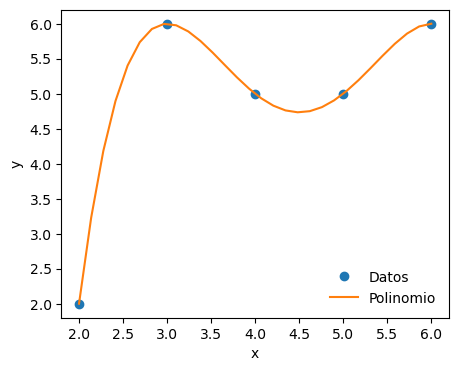

In [4]:
# graficando
xi = np.linspace(2, 6, 30)

# Gráfica
fig = plt.figure(figsize=(5, 4))
plt.plot(C[:, 0], C[:, 1], 'o', label='Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2- Pruebe que el método de Runge-Kutta de segundo orden (RK2) es concordante con una serie de Taylor hasta el segundo orden.

3- Considere la ecuación 2D:
\begin{align}
\frac{d^2x}{dt^2}&=-k\frac{dx}{dt}\sqrt{\left(\frac{dx}{dt}\right)^2+\left(\frac{dy}{dt}\right)^2}\\
\frac{d^2y}{dt^2}&=-g-k\frac{dy}{dt}\sqrt{\left(\frac{dx}{dt}\right)^2+\left(\frac{dy}{dt}\right)^2}\\
\end{align}

la cual describe la trayectoria de un proyectil teniendo en cuenta la resistencia del aire. Resuelva numéricamente dicha ecuación usando su código de RK4 vectorial y
- grafique la trayectoria del proyectil (es decir, $x(t) {\it vs} \; y(t)$),
- así como la evolución de las coordenadas $x(t)$, $y(t)$ en el tiempo (es decir $x(t)\; {\it vs}\; t$, $y(t) \; {\it vs} \; t$).

Considere $k=1, g=9.8, x(t=0)=1, v_x(t=0)=1, y(t=0)=5, v_y(t=0)=7.808$. Integre desde $t=[0, 2.5]$.

In [2]:
# Implementacion
def RK4Met(func, data, arg=None):
    """
    func -> (x, yval, a, b, ..) donde a, b, .. son argumentos que se han de pasar como listas a la variable arg
    """
    if arg:
        f = lambda x, yv: np.array(func(x, yv, *arg))
    else:
        f = lambda x, yv: np.array(func(x, yv))
    xval, yval = rk4Gene(f, data)
    
    return xval, yval
    

def rk4Gene(f, data):
    y0v, a, b, npt = data

    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    nEq = len(y0v)
    yval = np.zeros((npt, nEq))  # crea una matriz (npt, nEq)
    
    yv = np.copy(y0v)
    for j, xi in enumerate(xval):
        yval[j, :] = yv
        k0 = h*f(xi, yv)  # importante como se define la función, tiene que ser de la forma f(x, yv) donde yv=[y0, y1, ...]
        k1 = h*f(xi+h/2, yv+k0/2)
        k2 = h*f(xi+h/2, yv+k1/2)
        k3 = h*f(xi+h, yv+k2)
        yv = yv + (k0 + 2*k1 + 2*k2 + k3)/6
        #yv += (k0 + 2*k1 + 2*k2 + k3)/6
           
    return xval, yval

In [14]:
# Necesitamos reducir el orden al sistema, para ello definimos
# x -> x0, x' -> x1
# y -> y0, y' -> y1
# lo que nos lleva al sistema:


def proyectG(x, yv, k, g):
    x0, x1, y0, y1 = yv
    
    f0 = x1
    f1 = -k*x1*np.sqrt(x1**2+y1**2)
    f2 = y1
    f3 = -g-k*y1*np.sqrt(x1**2+y1**2)
    return [f0, f1, f2, f3]

# resolviendo
k, g = 1, 9.8
x0, x1, y0, y1 = 1, 1, 5, 7.808
y0v = [x0, x1, y0, y1]

t0, tf = 0, 2.5
npt = 200
data = [y0v, t0, tf, npt]

time, yVec = RK4Met(proyectG, data, arg=[k, g])

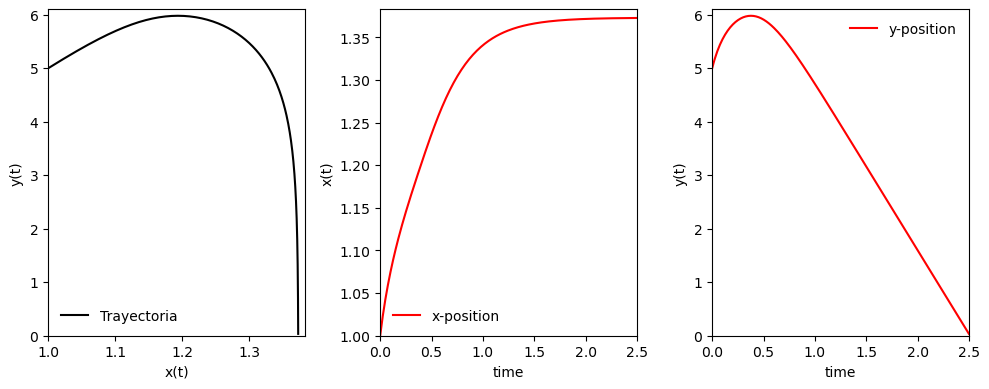

In [15]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# y(t) vs x(t)
ax[0].plot(yVec[:, 0], yVec[:, 2], lw=1.5, color='k', label=r'Trayectoria')

ax[0].set_ylabel(r'y(t)')
ax[0].set_xlabel(r'x(t)')
ax[0].set_xlim(yVec[0, 0], yVec[-1, 0]+0.01)
ax[0].set_ylim(0, 6.1)
ax[0].legend(frameon=False)

# x(t) vs t
ax[1].plot(time, yVec[:, 0], lw=1.5, color='r', label=r'x-position')

ax[1].set_ylabel(r'x(t)')
ax[1].set_xlabel(r'time')
ax[1].set_xlim(t0, tf)
ax[1].set_ylim(yVec[0, 0], yVec[-1, 0]+0.01)
ax[1].legend(frameon=False)

# y(t) vs t
ax[2].plot(time, yVec[:, 2], lw=1.5, color='r', label=r'y-position')

ax[2].set_ylabel(r'y(t)')
ax[2].set_xlabel(r'time')
ax[2].set_xlim(t0, tf)
ax[2].set_ylim(0, 6.1)
ax[2].legend(frameon=False)

plt.tight_layout()

4- De mecánica cuántica conocemos que una partícula norelativista dentro de una (1D)caja de longitud $L=2 a$, es descrita a través de la ecuación Schrödinger estacionaria.
$$
E\psi(x)=-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}
$$
Acá se considera que el potencial es $V=0$ dentro de la caja ($-a<x<a$), y que las paredes son infinitas. Considere $\hbar^2/m=1, a=0.5$ y obtenga los primeros cuatro autovalores de la energía y sus respectivas autofunciones usando:
- el método de shooting
- el método matricial (en caso de ser posible)

Compare los autovalores de la energía con el resultado analítico, $E_n=\frac{\hbar^2\pi^2}{8 m a^2}n^2$. Donde $n$ es el número del autovalor. Grafique las autofunciones y valode que presentan la siguiente estructura.

In [16]:
from root.BS import roo_Bis, Bis

# implementación NOTAR QUE ADAPTÉ LEVEMENTE LOS ANTERIORES
def shootS(func, s, dy0, y0, x0, xf, yf, npt): 
    y0v = [y0, dy0]
    data = [y0v, x0, xf, npt]   
    _, ys = RK4Met(func, data, arg=[s])
    #print(ys[-1, 0]-yf, ' ', ys[-1, 0], yf, sig)
    return ys[-1, 0]-yf

def shootingS(func, datos, arg=None, inter=[-1e10, 1e10], Nit=1000, Ndiv=100, eps=1e-05):
    dy0, y0, yf, x0, xf, npt = datos
    sol2 = lambda s: shootS(func, s, dy0, y0, x0, xf, yf, npt)
    #yder = Bis(sol2, inter, Nit=Nit, error='dist', eps=eps)
    yder = roo_Bis(sol2, inter, Nit=Nit, error='dist', eps=eps, Ndiv=Ndiv) 
    return yder

In [17]:
# implementación via shooting
# para este caso implementamos los sgtes cambios de variables
# psi -> y0, psi' -> y1, psi'' -> y1'
def boxSys(x, yv, E):
    h, m = 1, 1
    y0, y1 = yv
    f0 = y1
    f1 = -2*E*m*y0/h**2
    return [f0, f1]

y10 = 1.
a, b, b0, bf, npt = -0.5, 0.5, 0, 0, 400
datos = [y10, b0, bf, a, b, npt]
Inter = [0, 100]  # intervalo donde buscaremos el espectro
wP0 = shootingS(boxSys, datos, inter=Inter, Nit=1000, Ndiv=100, eps=1e-08)
wP0

[4.9348022073808355, 19.7392088219975, 44.41322003199596, 78.95683649965008]

In [18]:
# analítico
En = lambda n, a, h, m: h**2*np.pi**2*n**2/(8*a**2*m)
Errot = lambda x1, x2: np.abs(x1-x2)/np.abs(x2)

# comparación
print('Error relativo')
for i in range(1, 5):
    x1 = wP0[i-1]
    x2 = En(i, b, 1, 1)
    print('n=%d'%i, ' -> ', [x1, x2], ' -> Err= ', Errot(x1, x2))

Error relativo
n=1  ->  [4.9348022073808355, 4.934802200544679]  -> Err=  1.385294942315851e-09
n=2  ->  [19.7392088219975, 19.739208802178716]  -> Err=  1.0040313689417818e-09
n=3  ->  [44.41322003199596, 44.41321980490211]  -> Err=  5.113203917676095e-09
n=4  ->  [78.95683649965008, 78.95683520871486]  -> Err=  1.6349885517701052e-08


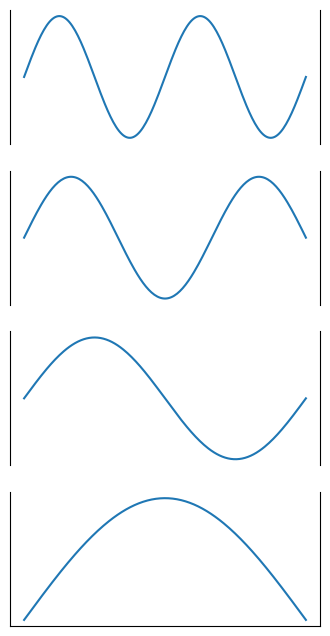

In [19]:
x0, xf = -0.5, 0.5
npt = 200
y0v = [0, 1]  # fijamos w'=1
data = [y0v, x0, xf, npt]

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(4, 8))
k = 0
for i in wP0[::-1]:
    x, y = RK4Met(boxSys, data, arg=[i])
    ax[k].plot(x, y[:,0], label=r'$s=%3.2f$'%i)
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    k += 1

ax[0].spines[['bottom', 'top']].set_visible(False)
ax[1].spines[['bottom', 'top']].set_visible(False)
ax[2].spines[['bottom', 'top']].set_visible(False)
ax[3].spines[['top']].set_visible(False)
#ax[k].axis("off")

#ax[0].legend(frameon=False)
#ax[0].set_ylabel('Autofunciones: w')
#ax[0].set_xlabel('x')

#for i in wP0:
#    ax[1].hlines(y=i, xmin=0, xmax=1, color='k')

#ax[1].set_ylabel(r's-Autovalores')
#ax[1].set_xlim(0, 1)

A continuación implementemos la forma matricial de:
$$
E\psi(x)=-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}  \quad \to \quad \frac{d^2\psi(x)}{dx^2}  = -\frac{2E m}{\hbar^2}\psi
$$

aplicando la diferenciación central tendremos:
$$
\psi_{j-1}-2\psi_j+\psi_{j+1}=-h^2\times \frac{2E m}{\hbar^2}\psi_j \quad \to A\psi=\lambda \psi
$$

`Comentario:` Para determinar las condiciones de frontera asumirémos que la autofunción es períodica, y por tanto $\psi_{-1}=\psi_{n-1}$ y $\psi_{n}=\psi_{0}$. Lo que hace que aparezcan un uno en la primera y última fila.

In [26]:
# implementación
def matrizA(data, info=False):
    a, b, npt = data
    h = (b-a)/(npt-1)  # h = 2*np.pi/npt equivale a tomar a=0, b=2pi, npt-1=N
    xi = a + np.arange(npt)*h  # np.arange(npt)*h
    
    # creando alpha, beta, gamma discretos
    alphaj = -2
    
    # Creando la matriz de dimensión n x n
    A = np.zeros((npt, npt))
    np.fill_diagonal(A[:, :], alphaj)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:-1, :], 1)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:, 2:], 1)  # recordar que no incluye el x_0
    A[0, -1] = 1
    A[-1, 0] = 1
    
    if info:
        print(A)

    return A, xi, h

In [27]:
from scipy.linalg import eig

# Construyendo la matriz
a, b, npt =  -0.5, 0.5, 400+1
data = a, b, npt
A, xi, h = matrizA(data, info=False)

# Obtenemos los autovalores y los autovectores
# derechos usando scipy.linalg.eig
lEnig1, V1 = eig(A)

# Comprobando que los autovalores y autovectores son la solución del
# sistema Ax=Lx
test = []
for i in range(npt):
    ntest = np.allclose(A@V1[:, i]-(lEnig1[i]*V1[:, i]), np.zeros(npt, dtype=complex))
    test.append(ntest)
test = np.array(test)
print('Comprobando que se cumple Ax=Lx ->', test)
    

# Obteniendo la s verdadera
sEng = -np.copy(lEnig1)/(2*h**2)  # Lambda = -h^2*2*E*m/hb^2
    
# Organizando de menor a mayor los autovalores
ii = np.argsort(sEng)  # devuelve los indices 
sEngF2 = sEng[ii] # ordenando los autovalores
VF1 = V1[:, ii]  # ordenando los autovectores

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [28]:
print('Los primero 4 Autovalores son \n')

# comparación
print('Error relativo')
for i in range(1, 5):
    x1 = sEngF2[i-1]
    x2 = En(i, b, 1, 1)
    print('n=%d'%i, ' -> ', [x1, x2], ' -> Err= ', Errot(x1, x2))

Los primero 4 Autovalores son 

Error relativo
n=1  ->  [(4.934776833732755-0j), 4.934802200544679]  -> Err=  5.140390818721824e-06
n=2  ->  [(19.738802934377468-0j), 19.739208802178716]  -> Err=  2.0561503012400753e-05
n=3  ->  [(44.41116512004374-0j), 44.41321980490211]  -> Err=  4.626291152494257e-05
n=4  ->  [(78.9503414828995-0j), 78.95683520871486]  -> Err=  8.224399823264215e-05


/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_10046/2598461130.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[0].plot(xi, y, label=r'$E=%3.2f$'%sEngF2[i])


(0.0, 1.0)

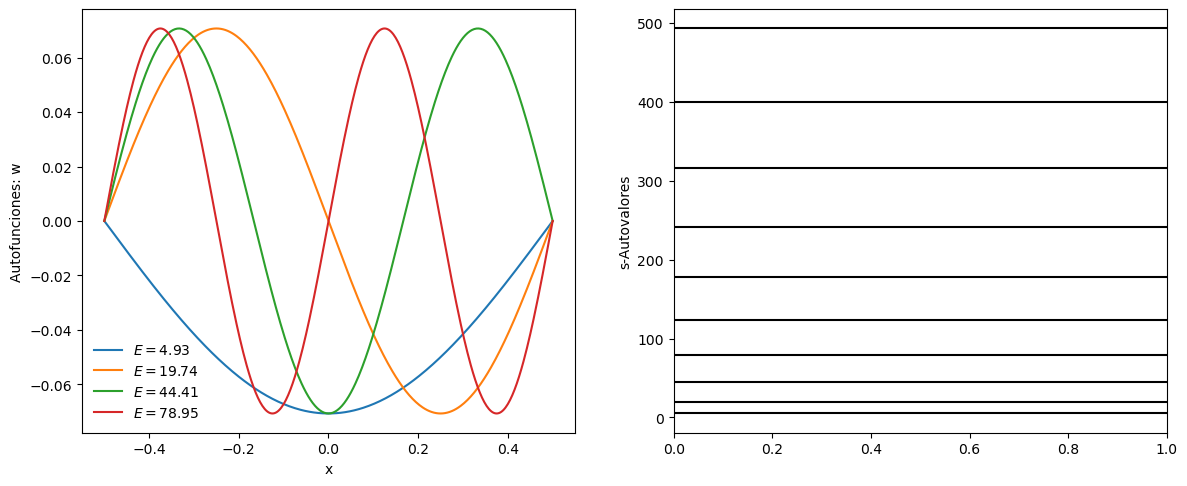

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))

for i in range(4):
    y = VF1[:, i]
    ax[0].plot(xi, y, label=r'$E=%3.2f$'%sEngF2[i])

  
ax[0].legend(frameon=False)
ax[0].set_ylabel('Autofunciones: w')
ax[0].set_xlabel('x')

for i in range(10):
    ax[1].hlines(y=sEngF2[i], xmin=0, xmax=1, color='k')

ax[1].set_ylabel(r's-Autovalores')
ax[1].set_xlim(0, 1)